### <center>Домашнее задание к уроку 3.</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### 1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log (как вариант - np.clip).

In [2]:
def calc_logloss(y, y_pred):
    return np.mean(- y * np.log(np.clip(y_pred, 1e-12, np.inf)) - (1.0 - y) * np.log(1.0 - np.clip(y_pred, -np.inf, 1 - 1e-12)))

#### 2. Подберите аргументы функции eval_LR_model для логистической регрессии таким образом, чтобы log loss был минимальным

In [3]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]], dtype = np.float64) # квалификация репетитора

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1]) # подходит или нет репетитор

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [5]:
def calc_std(x):
    return (x - x.mean()) / x.std()

In [6]:
def eval_LR_model(X, y, iterations, alpha=1e-4):
    
    np.random.seed(42)
    w = np.random.randn(X.shape[0])
    n = X.shape[1]
    
    for i in range(1, iterations + 1):    
        
        z = np.dot(w, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        w -= alpha * (1/n * np.dot((y_pred - y), X.T))
    
    return err, w

In [7]:
X_st = calc_std(X)

In [8]:
error_logloss = []
alpha = np.linspace(1e-8, 1e1, num=20)
for it in alpha:
    e = eval_LR_model(X_st, y, iterations=1000, alpha=it)[0]
    error_logloss.append(e)
# print(error_logloss)

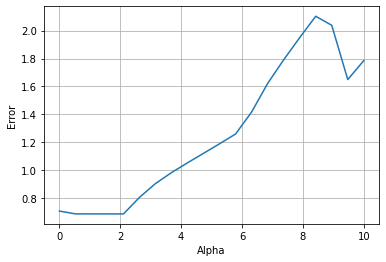

In [9]:
plt.plot(alpha, error_logloss)
plt.xlabel('Alpha')
plt.ylabel('Error')
plt.grid()
plt.show()

In [10]:
error_logloss = []
alpha = np.linspace(0.5, 2.162, num=100)
for it in alpha:
    e = eval_LR_model(X_st, y, iterations=1000, alpha=it)[0]
    error_logloss.append(e)
# print(error_logloss)

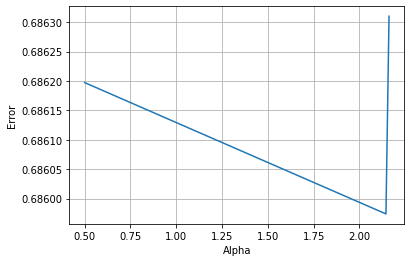

In [11]:
plt.plot(alpha, error_logloss)
plt.xlabel('Alpha')
plt.ylabel('Error')
plt.grid()
plt.show()

In [12]:
min_error = alpha[error_logloss.index(min(error_logloss))]

In [13]:
print(f'Минимальный logloss - {min(error_logloss)}, при значении alpha = {min_error}')

Минимальный logloss - 0.6859739670556694, при значении alpha = 2.145212121212121


#### 3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются веса, которые уже посчитаны функцией eval_LR_model и X, на выходе - массив y_pred_proba).

In [14]:
def calc_pred_proba(w, x):
    return sigmoid(np.dot(w, x))

In [15]:
min_w = eval_LR_model(X_st, y, iterations=1000, alpha=min_error)[1]

In [16]:
y_pred_proba = calc_pred_proba(min_w, X_st)
y_pred_proba

array([0.44388748, 0.4676634 , 0.47391313, 0.45575023, 0.55695403,
       0.48018804, 0.5625684 , 0.61769234, 0.43797916, 0.50384945])

#### 4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются веса, которые уже посчитаны функцией eval_LR_model и X, на выходе - массив y_pred).

In [17]:
def calc_pred(w, x, t_value=0.5):
    pred_class = calc_pred_proba(w, x)
    for val in range(len(pred_class)):
        pred_class[val] = 0 if pred_class[val] < t_value else 1
    return pred_class

#### 5. Посчитайте accuracy, матрицу ошибок, precision и recall, а также F1-score.

In [18]:
def accuracy(y_pred, y):
    done = 0
    for elem in range(len(y)):
        if y_pred[elem] == y[elem]:
            done += 1
    return done / len(y)

In [19]:
accuracy(calc_pred(min_w, X_st), y)

0.7

In [20]:
def confusion_matrix(y_pred, y):
    tp = 0
    tn = 0
    fp = 0
    fn = 0

    for val in range(len(y)):
        if y[val] == y_pred[val]:
            if y[val]:
                tp += 1
            else:
                tn += 1
        else:
            if y[val]:
                fp += 1
            else:
                tn += 1
    
    return tp, fp, fn, tn

In [21]:
tp, fp, fn, tn = confusion_matrix(calc_pred(min_w, X_st), y)

In [22]:
precision = tp / (tp + fp)

In [23]:
recall = tp / (tp + fn)

In [24]:
f1_score = (2 * precision * recall) / (precision + recall)

In [25]:
print(f'Precision = {precision}, Recall = {recall}, F1-score = {f1_score}')

Precision = 0.6, Recall = 1.0, F1-score = 0.7499999999999999


#### 6. Могла ли модель переобучиться? Почему?

Полнота равна единице, так что чисто теоретически могла. Но на модели с очень маленьким набором данных сложно что-то сказать наверняка.

#### 7. *Создайте функции eval_LR_model_l1 и eval_LR_model_l2 с применением L1 и L2 регуляризации соответственно.

In [26]:
def eval_LR_model_l1(X, y, iterations, alpha=1e-4, lambda_=1e-6):
    
    np.random.seed(42)
    w = np.random.randn(X.shape[0])
    n = X.shape[1]
    
    for i in range(1, iterations + 1):    
        
        z = np.dot(w, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        w -= alpha * (1/n * np.dot((y_pred - y), X.T)) + lambda_ * np.sign(w)
    
    return err, w

In [27]:
def eval_LR_model_l2(X, y, iterations, alpha=1e-4, lambda_=1e-6):
    
    np.random.seed(42)
    w = np.random.randn(X.shape[0])
    n = X.shape[1]
    
    for i in range(1, iterations + 1):    
        
        z = np.dot(w, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        w -= alpha * (1/n * np.dot((y_pred - y), X.T)) + 2 * lambda_ * w
    
    return err, w